<h1 style='text-align: center'><strong>Naive Bayes Classifier</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Spam Detection</strong></h2>
<h4 style='text-align: center'>Email spam detection using Bernoulli Naive Bayes</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
       <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Bernoulli-Naive-Bayes-model">Bernoulli Naive Bayes Model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#EasyExampleWithVideo">Easy Example With Video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

<p>Spam detection is a common problem in email filtering systems. One effective approach to solve this problem is using the Bernoulli Naive Bayes classifier. This classifier is particularly suitable for binary or boolean features, making it ideal for text classification tasks where the presence or absence of a word is significant.</p>

<h3>Why Bernoulli Naive Bayes?</h3>

<p>The Bernoulli Naive Bayes classifier is a variant of the Naive Bayes algorithm designed for binary/boolean features. Unlike the Multinomial Naive Bayes, which works with frequency counts of words, the Bernoulli Naive Bayes considers only the presence or absence of a word in a document. This is particularly useful when the features represent binary indicators of words.</p>

<h3>Mathematical Foundation</h3>

<p>The Bernoulli Naive Bayes classifier applies Bayes' Theorem with the assumption of conditional independence between features given the class. Mathematically, the classifier is defined as follows:</p>


$P(y|x_1, x_2, ..., x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i|y)}{P(x_1, x_2, ..., x_n)} $


Where:
- $P(y|x_1, x_2, ..., x_n)$ is the posterior probability of class $ y $ given features $ x_1, x_2, ..., x_n $
- $ P(y) $ is the prior probability of class $ y $
- $ P(x_i|y) $ is the likelihood, which is the probability of feature $ x_i $ given class $ y $
- $ P(x_1, x_2, ..., x_n) $ is the marginal probability of observing the features $ x_1, x_2, ..., x_n $


In the context of the Bernoulli Naive Bayes classifier:
- Each feature $ x_i $ is a binary indicator (0 or 1) representing the absence or presence of a word.
- The likelihood $ P(x_i|y) $ is modeled as a Bernoulli distribution.

<h3>Steps to Implement Bernoulli Naive Bayes for Spam Detection</h3>

- <strong>Dataset Preparation:</strong> Gather a dataset of emails labeled as spam or non-spam (ham). For this example, we will use the SMS Spam Collection Dataset, which contains a collection of SMS messages labeled as spam or ham (not spam).

- <strong>Calculate Prior Probabilities:</strong> Compute the prior probabilities $ P(\text{Spam}) $ and $ P(\text{No Spam}) $ based on the proportion of spam and non-spam messages in the dataset.


- <strong>Calculate Conditional Probabilities:</strong> Use Laplace smoothing to calculate the conditional probabilities for each feature (word) given each class. The formula for the conditional probability with Laplace smoothing is:
$ P(x_i = 1 | y) = \frac{N_{y, i} + \alpha}{N_y + 2\alpha} $
Where $ N_{y, i} $ is the number of instances where feature $ x_i $ is 1 in class $ y $, $ N_y $ is the total number of instances in class $ y $, and $ \alpha $ is the smoothing parameter (typically $ \alpha = 1 $).

- <strong>Classify New Emails:</strong> For a new email, calculate the posterior probabilities for each class using the prior and conditional probabilities, then select the class with the highest posterior probability.

<h3>Why Use Bernoulli Naive Bayes?</h3>

<ul>
  <li><strong>Simplicity:</strong> It is straightforward to implement and computationally efficient.</li>
  <li><strong>Suitability for Binary Features:</strong> It works well with binary/boolean data, making it ideal for text classification tasks where the presence or absence of a word is significant.</li>
  <li><strong>Independence Assumption:</strong> Despite the simplifying assumption of feature independence, it often performs well in practice for spam detection and other text classification tasks.</li>
</ul>


<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

- **pandas**: For data manipulation and analysis.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **CountVectorizer from sklearn.feature_extraction.text**: To convert text data into a matrix of token counts.
- **BernoulliNB from sklearn.naive_bayes**: To create and train the Bernoulli Naive Bayes model.
- **classification_report and ConfusionMatrixDisplay from sklearn.metrics**: To evaluate the model's performance.
- **matplotlib.pyplot**: For plotting the results.

<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

The SMS Spam Collection Dataset contains a collection of SMS messages labeled as spam or ham (not spam). The dataset can be downloaded from [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset). The dataset contains two columns: 'label' and 'message'. The 'label' column contains the class labels (spam or ham), and the 'message' column contains the SMS messages.

In [2]:
# Load the SMS Spam Collection dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])**: Loads the SMS Spam Collection dataset from a URL. The dataset is tab-separated, and the columns are labeled as 'label' and 'message'.
- **df.head()**: Displays the first few rows of the dataset.

<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Convert the labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Use CountVectorizer to convert text messages into a matrix of token counts
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df['message'])

# Target variable
y = df['label']

- **df['label'] = df['label'].map({'ham': 0, 'spam': 1})**: Converts the labels 'ham' and 'spam' into binary values 0 and 1, respectively.
- **vectorizer = CountVectorizer(binary=True)**: Initializes the CountVectorizer to convert text messages into a matrix of token counts.
- **X = vectorizer.fit_transform(df['message'])**: Fits the CountVectorizer to the text data and transforms it into a matrix of token counts.
- **y = df['label']**: Sets the target variable as the binary labels.

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (X_train and y_train), and 20% is used for testing (X_test and y_test).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.

<h2 style='text-align: center' id='Bernoulli-Naive-Bayes-model'><strong>6. Bernoulli Naive Bayes Model</strong></h2>

In [5]:
# Create and train the Bernoulli Naive Bayes model
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

- **model = BernoulliNB()**: Initializes the Bernoulli Naive Bayes model.
- **model.fit(X_train, y_train)**: Trains the model using the training data (X_train and y_train).


<h2 style='text-align: center' id='Predictions'><strong>7. Predictions</strong></h2>

In [6]:
# Make predictions
y_pred = model.predict(X_test)

- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (X_test).


<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



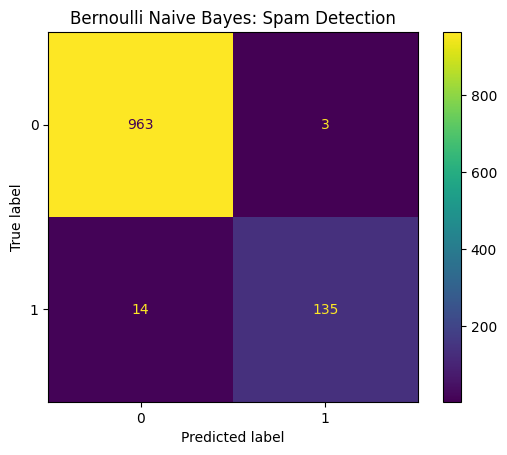

In [7]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Bernoulli Naive Bayes: Spam Detection')
plt.show()

- **print(classification_report(y_test, y_pred))**: Prints the classification report, which includes precision, recall, f1-score, and support for each class.
- **ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)**: Plots the confusion matrix for the model's predictions.
- **plt.title('Bernoulli Naive Bayes: Spam Detection')**: Sets the title of the plot.
- **plt.show()**: Displays the plot.

<h2 style='text-align: center' id='EasyExampleWithVideo'><strong>9. Easy Example With Video</strong></h2>
<div style='text-align: center'>
    <a href='https://www.instagram.com/reel/C8pWZi-xRij/'><img src='Videos/NaiveBayesClassifier.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>

Code

In [8]:
import numpy as np

# Define the training data
emails = np.array([
    [1, 1, 0],  # Email 1: Contains "Offer", Contains "Win", Does not contain "Urgent"
    [0, 1, 1],  # Email 2: Does not contain "Offer", Contains "Win", Contains "Urgent"
    [0, 0, 0],  # Email 3: Does not contain "Offer", Does not contain "Win", Does not contain "Urgent"
    [1, 0, 1],  # Email 4: Contains "Offer", Does not contain "Win", Contains "Urgent"
    [0, 0, 1]   # Email 5: Does not contain "Offer", Does not contain "Win", Contains "Urgent"
])

labels = np.array(['Spam', 'Spam', 'No Spam', 'No Spam', 'No Spam'])

# Step 1: Calculate the prior probabilities
num_spam = np.sum(labels == 'Spam')
num_no_spam = np.sum(labels == 'No Spam')
total_emails = len(labels)

P_spam = num_spam / total_emails
P_no_spam = num_no_spam / total_emails

print(f"P(Spam) = {P_spam}")
print(f"P(No Spam) = {P_no_spam}")

# Step 2: Calculate the conditional probabilities using Laplace smoothing
alpha = 1  # Laplace smoothing parameter

def conditional_probabilities(feature_index, value, class_label):
    class_count = np.sum(labels == class_label)
    feature_class_count = np.sum((emails[:, feature_index] == value) & (labels == class_label))
    return (feature_class_count + alpha) / (class_count + 2 * alpha)

# Probabilities condicionales para "Offer"
P_offer_given_spam = conditional_probabilities(0, 1, 'Spam')
P_offer_given_no_spam = conditional_probabilities(0, 1, 'No Spam')

# Probabilities condicionales para "Win"
P_win_given_spam = conditional_probabilities(1, 1, 'Spam')
P_win_given_no_spam = conditional_probabilities(1, 1, 'No Spam')

# Probabilities condicionales para "Urgent"
P_urgent_given_spam = conditional_probabilities(2, 1, 'Spam')
P_urgent_given_no_spam = conditional_probabilities(2, 1, 'No Spam')

print(f"P(Offer = 1 | Spam) = {P_offer_given_spam}")
print(f"P(Offer = 1 | No Spam) = {P_offer_given_no_spam}")
print(f"P(Win = 1 | Spam) = {P_win_given_spam}")
print(f"P(Win = 1 | No Spam) = {P_win_given_no_spam}")
print(f"P(Urgent = 1 | Spam) = {P_urgent_given_spam}")
print(f"P(Urgent = 1 | No Spam) = {P_urgent_given_no_spam}")

# Step 3: Calculate the posterior probabilities for a new email
new_email = np.array([1, 0, 1])  # New email: Contains "Offer", Does not contain "Win", Contains "Urgent"

# Calculate the posterior probabilities for Spam
P_spam_given_new_email = P_spam * P_offer_given_spam * (1 - P_win_given_spam) * P_urgent_given_spam

# Calculate the posterior probabilities for No Spam
P_no_spam_given_new_email = P_no_spam * P_offer_given_no_spam * (1 - P_win_given_no_spam) * P_urgent_given_no_spam

print(f"P(Spam | New Email) = {P_spam_given_new_email}")
print(f"P(No Spam | New Email) = {P_no_spam_given_new_email}")

# Step 4: Make a classification decision
if P_no_spam_given_new_email > P_spam_given_new_email:
    classification = 'No Spam'
else:
    classification = 'Spam'

print(f'The new email is classified as: {classification}')


P(Spam) = 0.4
P(No Spam) = 0.6
P(Offer = 1 | Spam) = 0.5
P(Offer = 1 | No Spam) = 0.4
P(Win = 1 | Spam) = 0.75
P(Win = 1 | No Spam) = 0.2
P(Urgent = 1 | Spam) = 0.5
P(Urgent = 1 | No Spam) = 0.6
P(Spam | New Email) = 0.025
P(No Spam | New Email) = 0.1152
The new email is classified as: No Spam
